In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.covariance
import sklearn.cluster
import datetime

In [2]:
met = pd.read_hdf('../../input/df/met/usa_ds3505.h5').loc[724050]

In [3]:
obs = pd.read_hdf('../../input/df/obs/cherry_dc.h5').loc['DC']

Some years are missing weather data(i.e. '1969-09-01':'1972-12-31').

In [4]:
years = set(range(1940, 2010)) - set([1946, 1970, 1971, 1972, 1973])

In [5]:
years = years & set(obs.index.get_level_values('year'))

In [6]:
met = pd.concat([met.loc[f'{y-1}-10-01':f'{y}-03-31'] for y in years])

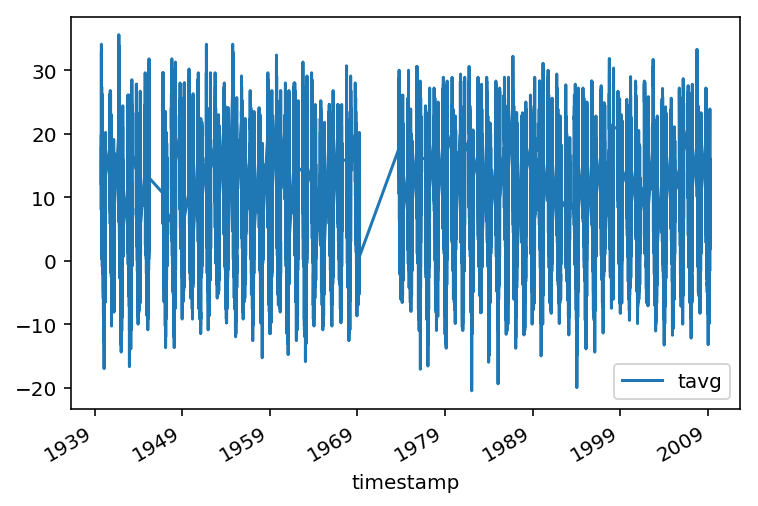

In [7]:
met.plot()

In [8]:
def extract_months(met, months):
    df = met.loc[met.index.month.isin(months)].resample('A').mean().dropna()
    return df.sort_values('tavg', ascending=False)

In [9]:
chill = extract_months(met, [10, 11, 12])

In [10]:
chill.count()

tavg    65
dtype: int64

$L$ is a threshold determining how many samples we'd like to extract from top and bottom of the distribution. Simply put, we're going to take 'Top $L$' and 'Bottom $L$' of the distribution.

In [11]:
L = 15

In [12]:
def top(df, threshold=L):
    return df[:threshold]

In [13]:
def bottom(df, threshold=L):
    return df[-threshold:]

In [14]:
chill.tavg.mean()

9.615684209370384

In [15]:
top(chill).tavg.mean()

11.09414113377242

In [16]:
bottom(chill).tavg.mean()

8.185839829692393

In [17]:
def plot(df, threshold=L):
    ax = df.plot(style='.', color='grey')
    top(df, threshold).plot(style='.', color='r', ax=ax)
    bottom(df, threshold).plot(style='.', color='b', ax=ax)
    ax.legend(['Others', f'Top {threshold}', f'Bottom {threshold}'])
    plt.axhline(y=df.tavg.mean(), color='k', ls=':')

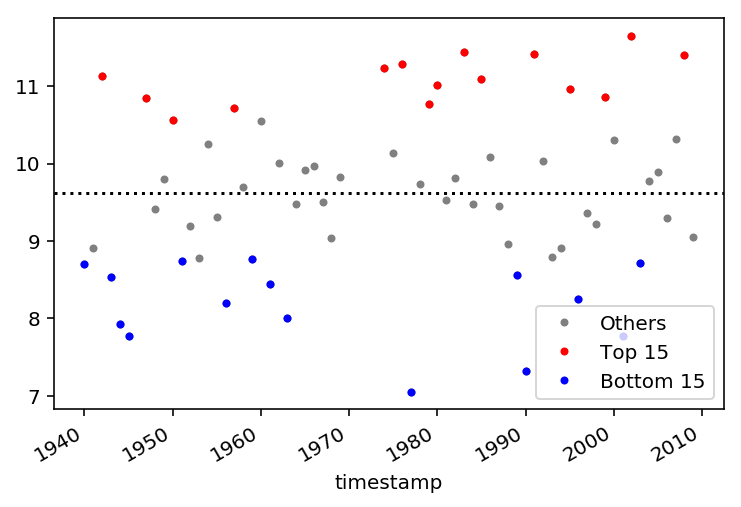

In [18]:
plot(chill)

In [19]:
def top_years(df, threshold=L):
    return set(top(df, threshold).index.year.sort_values())

In [20]:
chill_top_years = top_years(chill)
chill_top_years

{1941,
 1946,
 1949,
 1956,
 1973,
 1975,
 1978,
 1979,
 1982,
 1984,
 1990,
 1994,
 1998,
 2001,
 2007}

In [21]:
def bottom_years(df, threshold=L):
    return set(bottom(df, threshold).index.year.sort_values())

In [22]:
chill_bottom_years = bottom_years(chill)
chill_bottom_years

{1939,
 1942,
 1943,
 1944,
 1950,
 1955,
 1958,
 1960,
 1962,
 1976,
 1988,
 1989,
 1995,
 2000,
 2002}

In [23]:
chill_years = chill_top_years | chill_bottom_years

In [24]:
heat = extract_months(met, [1, 2, 3])

In [25]:
heat.tavg.mean()

4.497171545027255

In [26]:
top(heat).tavg.mean()

6.368303998087654

In [27]:
bottom(heat).tavg.mean()

2.8483224195043677

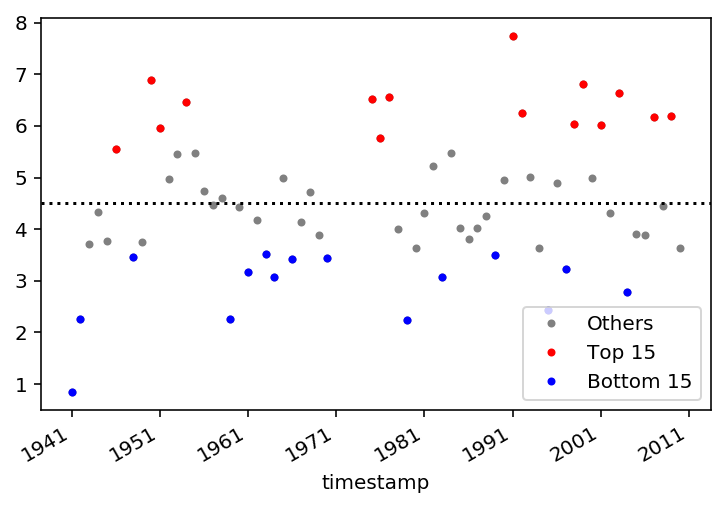

In [28]:
plot(heat)

In [29]:
heat_top_years = top_years(heat)
heat_top_years

{1945,
 1949,
 1950,
 1953,
 1974,
 1975,
 1976,
 1990,
 1991,
 1997,
 1998,
 2000,
 2002,
 2006,
 2008}

In [30]:
heat_bottom_years = bottom_years(heat)
heat_bottom_years

{1940,
 1941,
 1947,
 1958,
 1960,
 1962,
 1963,
 1965,
 1969,
 1978,
 1982,
 1988,
 1994,
 1996,
 2003}

In [31]:
heat_years = heat_top_years | heat_bottom_years

In [32]:
len(chill_years & heat_years)

16

Here are four possible combinations of chill and heat extremes. If we want more samples, increase threshold variable $L$ above and rerun the notebook.

In [33]:
chill_top_years & heat_top_years

{1949, 1975, 1990, 1998}

In [34]:
chill_top_years & heat_bottom_years

{1941, 1978, 1982, 1994}

In [35]:
chill_bottom_years & heat_top_years

{1950, 1976, 2000, 2002}

In [36]:
chill_bottom_years & heat_bottom_years

{1958, 1960, 1962, 1988}